Dataset Link: https://www.kaggle.com/datasets/venky73/spam-mails-dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/spam_ham_dataset.csv", encoding="latin-1")
print(data.shape)
print("Dataset sample:")
data.head()

(5171, 4)
Dataset sample:


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
all_text = ' '.join(data['text'].astype(str).values)
words = all_text.split()
unique_words = set(words)
num_unique_words = len(unique_words)
print(f"Number of unique words in 'text' column: {num_unique_words}")

Number of unique words in 'text' column: 50615


In [ ]:
th = 100
print(data.iloc[th]['text'])
data.iloc[th]

Subject: help !
brian ,
who do i talk to about getting daren farmer a labor distribution report . he
needs to see what employees are hitting his rc . i know that we have
discussed this prior and soem managers are receiving a monthly report but he
is not . who can help us ? ? ?
thank you !
yvette
x 3 . 5953


,100
Unnamed: 0,479
label,ham
text,"Subject: help !\r\nbrian ,\r\nwho do i talk to..."
label_num,0


In [ ]:
data['text'] = data['text'].str.lower()

X = data['text']
y = data['label']  # Expecting values like 'spam' and 'ham'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,text
5132,subject: april activity surveys\r\nwe are star...
2067,subject: message subject\r\nhey i ' am julie ^...
4716,subject: txu fuels / sds nomination for may 20...
4710,subject: re : richardson volumes nov 99 and de...
2268,subject: a new era of online medical care .\r\...


In [ ]:
y_train.head()

,label
5132,ham
2067,spam
4716,ham
4710,ham
2268,spam


In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
X_train_tfidf.shape

(4136, 44934)

In [ ]:
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
y_pred = log_reg.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 99.03%

Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       742
        spam       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



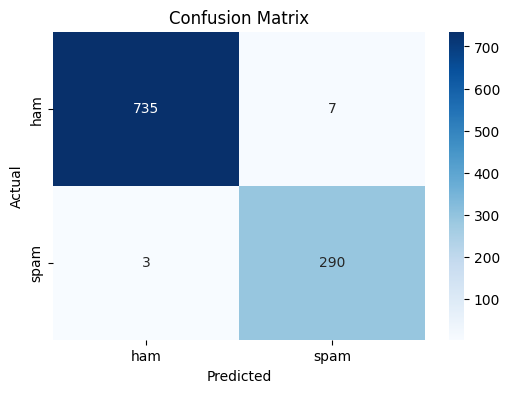

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def classify_email(message):
    message = message.lower()
    message_tfidf = tfidf_vectorizer.transform([message])
    prediction = log_reg.predict(message_tfidf)
    return prediction[0]

# Test the classifier with a sample email message
# sample_message = "Congratulations! You've won a free prize. Reply now to claim your reward!"
sample_message = "Congratulations! You are selected for the interview. Please see the attached schedule."
# sample_message = "Thank you for hanging up everyone! It was fun. I'll try to get a haircut tomorrow."
result = classify_email(sample_message)
print(f"\nThe sample message was classified as: {result}")



The sample message was classified as: ham
